In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [60]:
df=pd.read_csv("Live_20210128.csv")
df

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,7046,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,7047,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,7048,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,7049,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN


In [61]:
df.isna().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [62]:
df=df.drop(["Column1","Column2","Column3","status_id","Column4","status_published"],axis=1)
df

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7045,photo,89,0,0,89,0,0,0,0,0
7046,photo,16,0,0,14,1,0,1,0,0
7047,photo,2,0,0,1,1,0,0,0,0
7048,photo,351,12,22,349,2,0,0,0,0


In [63]:
df=pd.get_dummies(df,drop_first=True)
df

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_photo,status_type_status,status_type_video
0,529,512,262,432,92,3,1,1,0,False,False,True
1,150,0,0,150,0,0,0,0,0,True,False,False
2,227,236,57,204,21,1,1,0,0,False,False,True
3,111,0,0,111,0,0,0,0,0,True,False,False
4,213,0,0,204,9,0,0,0,0,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
7045,89,0,0,89,0,0,0,0,0,True,False,False
7046,16,0,0,14,1,0,1,0,0,True,False,False
7047,2,0,0,1,1,0,0,0,0,True,False,False
7048,351,12,22,349,2,0,0,0,0,True,False,False


## Finding Optimal Number Of Clusters Using Elbow Method

In [49]:
from sklearn.cluster import KMeans

sse=[]
ranges=[i for i in range(1,20)]
for i in ranges:
    mdl=KMeans(n_clusters=i,n_init="auto")
    mdl.fit(df)
    sse.append(mdl.inertia_)
sse

[8645689522.263124,
 5548981842.706314,
 2735261320.651328,
 2002151591.7287521,
 1694242797.753918,
 1205250330.3370326,
 1114214685.6820455,
 751801006.5918047,
 709377869.0714552,
 562392129.324702,
 452176037.9052681,
 415983952.89734375,
 372102757.1349122,
 296377290.2011535,
 278658243.8330922,
 298262264.48834306,
 227096898.80293244,
 210973959.1431197,
 206809556.71375066]

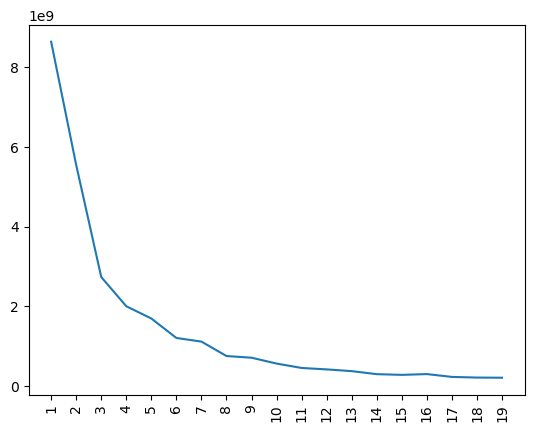

In [50]:
plt.plot(ranges,sse)
plt.xticks(ranges,rotation=90)
plt.show()

In [66]:
from sklearn.metrics import silhouette_score
model_km=KMeans(n_clusters=4,n_init="auto")
model_km.fit(df)
labels=model_km.labels_
silhouette_score(df,labels)

0.8134174408074849

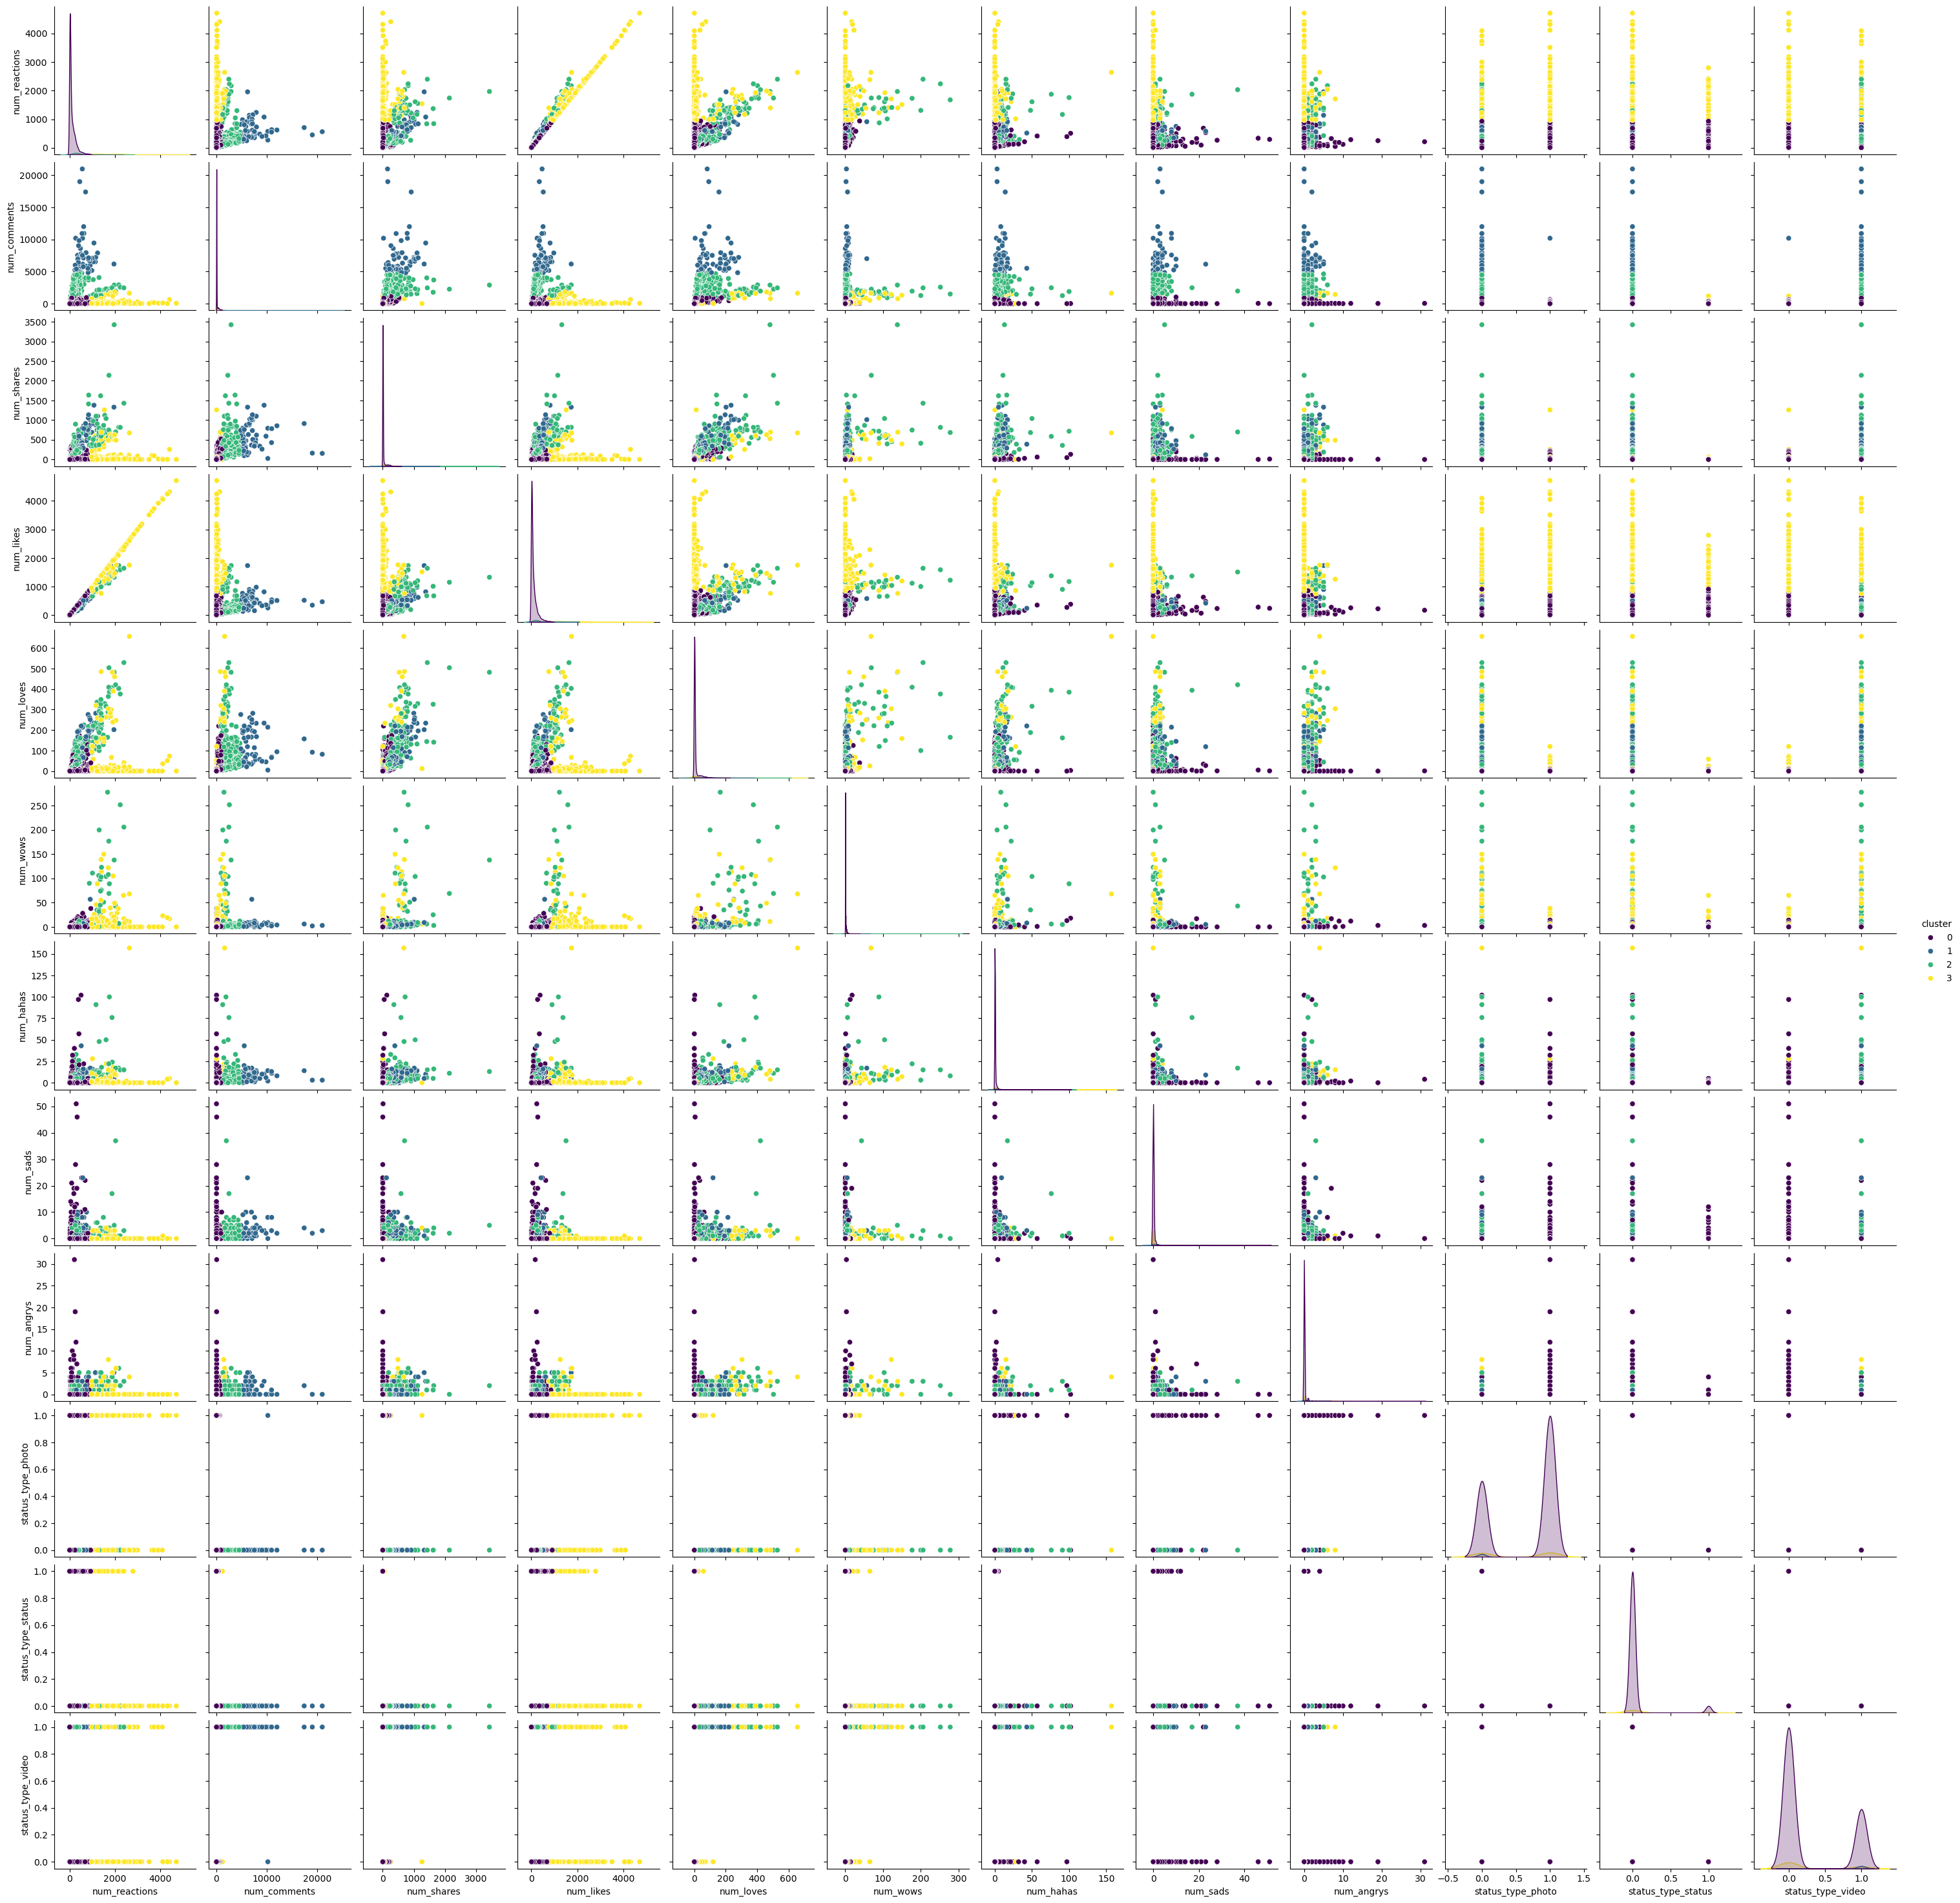

In [57]:
df_KM=df
df_KM["cluster"]=labels
sns.pairplot(df_KM,hue="cluster",palette="viridis")
plt.show()

In [65]:
from sklearn.cluster import AgglomerativeClustering

model_HC=AgglomerativeClustering(n_clusters=4,linkage="ward")
model_HC.fit(df)
labels=model_HC.labels_

SyntaxError: invalid syntax (716141112.py, line 5)